# Churning Customers
# Goal:
    * Discover drivers of churn in telco dataset
    * Use drivers to develop a machine learning model to classify customers as likely to churn or not likely to churn

In [1]:
#Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import env

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

import acquire
from scipy import stats
import re

import prepare as p

# Acquire
    * Data acquired from telco.csv file
    * It contained 7043 rows and 24 columns before cleaning
    * Each row represents a customer in the telco database
    * Each column represents a feature of the customer

# Prepare
Prepare Actions:
    * Removed columns that did not contain useful information
    * Rename columns to promote readability
    * Checked for null in the data
    * Checked that colmn data types were appropriate
    * Removed white space from values in object columns
    * Encoded categorical variables
    * Split data into train, validate, and test, stratifying on 'churn'
    * Scaled continous variables
    * Outliers have not been removed from this iteration  of the project
    

In [2]:
def prep_telco(telco):
    telco = telco.drop(columns=['gender', 'partner', 'dependents', 'customer_id', 'internet_service_type_id', 'contract_type_id', 'payment_type_id','monthly_charges', 'total_charges'])

    telco['Female_Yes'] = telco.gender.map({'Female': 1, 'Male': 0})
    telco['partner_Yes'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents_Yes'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service_Yes'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing_Yes'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn_Yes'] = telco.churn.map({'Yes': 1, 'No': 0})
    
    dummy_df = pd.get_dummies(telco[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'
                            ]],
                              drop_first=True)
    telco = pd.concat( [telco, dummy_df], axis=1 )
    
    return telco

In [12]:
df = acquire.new_telco_data()
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [6]:
df = prep_telco(df)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [9]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',

<function matplotlib.pyplot.show(close=None, block=None)>

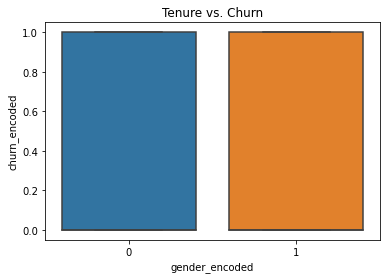

In [11]:
sns.boxplot(data=df, y='churn_encoded', x='gender_encoded')
plt.title('Tenure vs. Churn')
plt.show

In [1]:
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
def get_tree(train_X, validate_X, train_y, validate_y):
    '''get decision tree accuracy on train and validate data'''

    # create classifier object
    clf = DecisionTreeClassifier(max_depth=5, random_state=123)

    #fit model on training data
    clf = clf.fit(train_X, train_y)

    # print result
    print(f"Accuracy of Decision Tree on train data is {clf.score(train_X, train_y)}")
    print(f"Accuracy of Decision Tree on validate data is {clf.score(validate_X, validate_y)}")

In [ ]:
def model_prep(train,validate,test):
    '''Prepare train, validate, and test data for modeling'''

    # drop unused columns 
    keep_cols = ['senior_citizen',
                 'monthly_charges',
                 'tenure']

    train = train[keep_cols]
    validate = validate[keep_cols]
    test = test[keep_cols]
    
    # Split data into predicting variables (X) and target variable (y) and reset the index for each dataframe
    train_X = train.drop(columns='churn').reset_index(drop=True)
    train_y = train[['churn']].reset_index(drop=True)

    validate_X = validate.drop(columns='churn').reset_index(drop=True)
    validate_y = validate[['churn']].reset_index(drop=True)

    test_X = test.drop(columns='churn').reset_index(drop=True)
    test_y = test[['churn']].reset_index(drop=True)

    # manual encoding
    train_X['rated'] = train_X.rated.apply(lambda value: 1 if value == True else 0)
    train_X['lower_rated_white'] = train_X.lower_rated_white.apply(lambda value: 1 if value == True else 0)

    # Change target column to show values as upset or non-upset
    train_y['upset'] = train_y.upset.apply(lambda value: "upset" if value == True else "non-upset")
    validate_y['upset'] = validate_y.upset.apply(lambda value: "upset" if value == True else "non-upset")
    test_y['upset'] = test_y.upset.apply(lambda value: "upset" if value == True else "non-upset")

    return train_X, validate_X, test_X, train_y, validate_y, test_y